In [1]:
from finlab.data import Data
import datetime
data = Data()
data.date = datetime.date(2019,5,5)

# 計算股價淨值比 Price/Book Ratio（pb）

In [2]:
price = data.get('收盤價', 300)
# price.loc['2018-02-02']
price

stock_id,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
date,,,,,,,,,,,,,,,,,,,,,
2018-02-02,84.90,32.30,57.80,37.49,24.66,16.99,26.34,51.95,46.75,41.84,...,38.50,112.5,NaN,91.5,53.9,19.75,32.80,13.20,14.70,52.80
2018-02-05,83.60,31.75,56.75,36.53,24.20,16.69,26.00,51.15,46.04,41.43,...,37.90,112.0,NaN,91.5,53.7,19.70,32.45,13.20,14.00,58.00
2018-02-06,79.65,29.99,56.25,34.80,22.80,15.89,24.99,48.76,45.25,39.49,...,35.75,108.0,NaN,87.5,52.4,19.00,30.70,12.50,13.05,52.20
2018-02-07,80.65,30.80,56.85,35.56,23.39,16.20,25.43,49.00,46.06,40.50,...,36.05,109.0,NaN,89.0,52.8,19.35,30.85,12.65,13.25,48.95
2018-02-08,80.60,30.33,56.20,35.39,NaN,16.25,25.50,49.00,44.97,40.72,...,37.30,111.5,NaN,90.5,52.6,19.60,30.70,12.65,13.00,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-26,82.45,NaN,56.40,35.79,22.72,17.46,27.52,52.00,47.10,43.98,...,31.30,115.5,53.9,72.7,65.5,16.00,41.65,18.35,12.40,62.40
2019-04-29,82.80,32.61,56.10,35.81,22.82,17.64,27.35,52.00,47.33,44.76,...,31.25,115.0,53.9,72.1,65.4,16.00,41.80,19.15,12.45,62.00
2019-04-30,82.80,32.62,56.40,35.40,22.74,17.75,27.35,52.00,47.31,44.90,...,31.45,115.5,53.9,72.2,65.4,16.00,42.40,19.20,12.35,60.90


In [30]:
# 先利用 data 取出需要的值
price = data.get('收盤價', 300)
股東權益 = data.get('歸屬於母公司業主之權益合計', 1)
股本 = data.get('普通股股本', 1)

# 股價淨值比 = 股價 / 每股淨值
# 每股淨值 = 股東權益 / 流通股數
# 流通股數 = 股本 / 10

流通股數 = 股本 / 10
每股淨值 = 股東權益 / 流通股數
今日股價 = price.iloc[-1]

股價淨值比pb = 今日股價 / 每股淨值
股價淨值比pb
# 股價淨值比pb.transpose().dropna(axis='index')

stock_id,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.600986,1.37842,1.023141,NaN,NaN,NaN,0.737681,3.542782,NaN,NaN


In [31]:
def 股價淨值比(n):
    
    股東權益 = data.get('歸屬於母公司業主之權益合計', n)
    股本 = data.get('普通股股本', n)
    price = data.get('收盤價', 100*n)
    return price.reindex(股本.index, method='ffill')/(股東權益/股本)/10


股價淨值比pb = 股價淨值比(4) #取得近四季的股價淨值比
股價淨值比pb

stock_id,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.699842,1.034376,0.734212,NaN,NaN,NaN,0.713314,4.067637,NaN,NaN
2018-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.600207,1.021605,0.762610,NaN,NaN,NaN,0.695519,5.178381,NaN,NaN
2018-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.615097,1.004457,0.651001,NaN,NaN,NaN,0.717971,4.907020,NaN,NaN
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.608546,1.513178,0.822843,NaN,NaN,NaN,0.773961,4.128596,NaN,NaN


stock_id
0050         NaN
0051         NaN
0052         NaN
0053         NaN
0054         NaN
          ...   
9951         NaN
9955    0.773961
9958    4.128596
9960         NaN
9962         NaN
Name: 2019-03-31 00:00:00, Length: 1899, dtype: float64

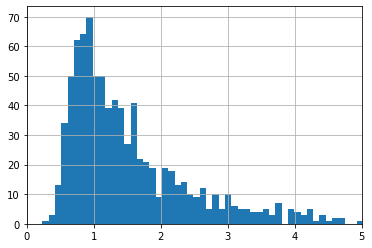

In [36]:
# 畫圖的起手式
import matplotlib.pyplot as plt
%matplotlib inline

# 找出最後一筆股價淨值比
起始股價淨值比pb = 股價淨值比pb.iloc[-1]

# # 畫出 histogram 分佈圖 （股價為x的股票有幾檔？）
起始股價淨值比pb.hist(bins=500) #bins 長條圖的數量
plt.xlim(0,5) # 省略超過五的不顯示

# # # X軸為股價淨值比，Y軸為股票的數量
起始股價淨值比pb

In [41]:
import pandas as pd

結束股價 = price.iloc[-1] # 最後一筆股價
起始股價 = price.loc[股價淨值比pb.index[0]] # 淨值比公佈當天

獲利 = (結束股價/起始股價 - 1) * 100

起始股價淨值比 = 股價淨值比pb.iloc[0]

選股獲利 = 獲利[起始股價淨值比 < 0.5]
# 選股獲利
print(f'張數：{len(選股獲利)}')
print(f'獲利：{選股獲利.mean()}%')  #mean 平均數


張數：11
獲利：6.600287287960565%


In [44]:
# 條件
# print(起始股價淨值比 < 0.5)
condition = (起始股價淨值比 < 0.5)

# 選出符合條件的股票
# print(condition[condition])
stocks = condition[condition].index
# print(stocks)
# 印出股票和其股價

stocks_price = price[stocks]
stocks_price.head()

stock_id,1235,1262,1337,2362,2387,2841,3481,3703,4930,4942,8411
date,,,,,,,,,,,
2018-02-02,34.00,60.9,13.05,28.00,17.25,10.10,13.70,16.15,13.05,23.65,25.55
2018-02-05,33.70,60.0,12.85,27.65,16.95,10.00,13.40,15.90,12.95,23.55,25.60
2018-02-06,33.60,56.4,12.00,26.40,15.90,9.50,12.75,14.80,12.60,22.75,24.90
2018-02-07,33.30,58.9,12.15,26.40,16.10,9.65,13.10,15.10,12.50,23.15,25.05
2018-02-08,33.05,56.1,12.25,26.60,16.10,9.64,13.50,15.05,12.50,22.90,25.00


# 持有一段時間 簡易回測

<AxesSubplot:xlabel='date'>

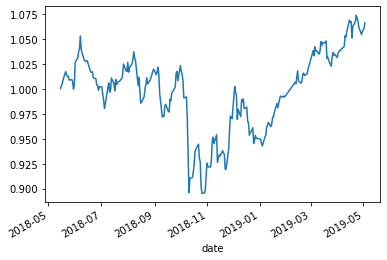

In [46]:
# 設定起始時間：我們看到 股價淨值比 的當下
start_time = 股價淨值比pb.index[0]

# 設定結束時間：我們股價最後一筆
end_time = price.index[-1]

# 將 stocks_price 的股價，選出時間段（start_time ~ end_time），將每天股票平均，並畫出來，當作是買入一籃子股票（類似於每檔買一張）
# stocks_price.loc[start_time:end_time].mean(axis=1).plot()

# # 跟上面一樣，但是將資產平均分散買入
stock_price = stocks_price.loc[start_time:end_time]
(stock_price/stock_price.iloc[0]).mean(axis=1).plot() #secondary_y=True